In [12]:
import numpy as np
import healpy as hp

In [19]:
def pix2radec(nside, index):
    theta,phi=hp.pixelfunc.pix2ang(nside,index)
    return -np.degrees(np.pi*2.-phi), -np.degrees(theta-np.pi/2.)

def radec2pix(nside, RA, dec):
    return hp.pixelfunc.ang2pix(nside,np.radians(-dec+90.),np.radians(360.-RA))

In [20]:
path_toast = 'toast_pure_maps/0/E_telescope_all_time_all_binned.fits'
path_input = 'healpy_maps/E/map_0.fits'

In [21]:
m_toast = hp.read_map(path_toast, field=None)
m_in = hp.read_map(path_input, field=None)

NSIDE = 64
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
NSIDE = 64
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING


In [12]:
# hp.mollview(m_toast[0])

In [14]:
nside = 64
npix = hp.nside2npix(nside)

patch = np.zeros(npix)
indices = np.arange(npix)
RA, dec = pix2radec(nside, indices)
RA[(RA<-180)] += 360
south = indices[(dec> -65) & (dec<-25) & (RA>-50) & (RA<70)]
patch[south] = 1


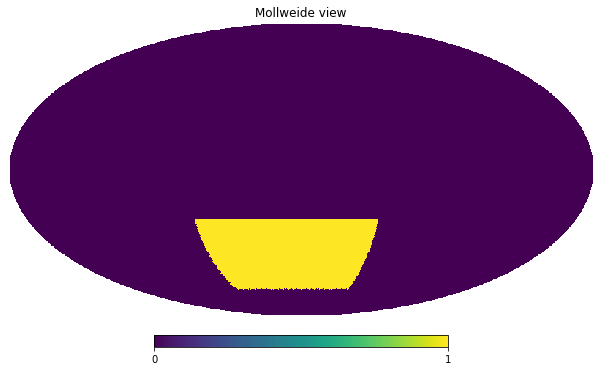

In [15]:
hp.mollview(patch)

In [16]:
len(np.where(patch==1)[0])/npix * npix

3991.0

In [17]:
hp.write_map('./south_patch_64.fits', hp.reorder(patch, r2n=True), overwrite=True, nest=True)

/global/common/software/cmb/cori/cmbenv-gcc_20200630/cmbenv_aux/lib/python3.7/site-packages/healpy-1.13.0-py3.7-linux-x86_64.egg/healpy/fitsfunc.py:187: FutureWarning: The default dtype of write_map() will change in a future version: explicitly set the dtype if it is important to you
  category=FutureWarning)


NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


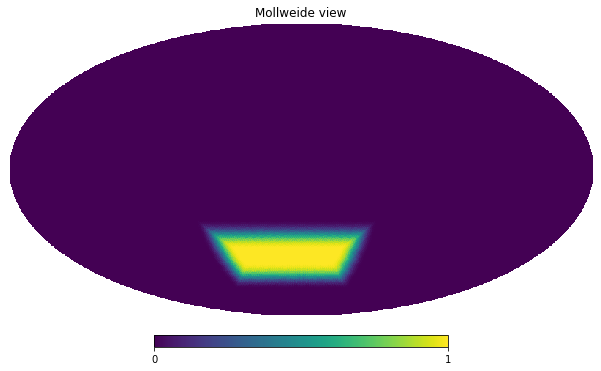

In [23]:
mask_apo = hp.read_map('south_patch_apo_64.fits')
hp.mollview(m)

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.0084075927734375


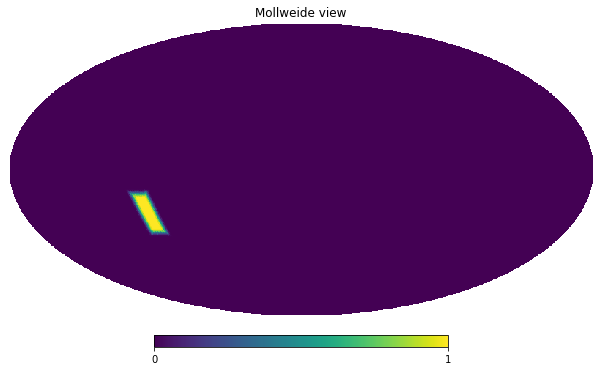

In [11]:
m = hp.read_map('small_patch_apo_128.fits')
hp.mollview(m)
print(len(np.where(m!=0)[0])/len(m))

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


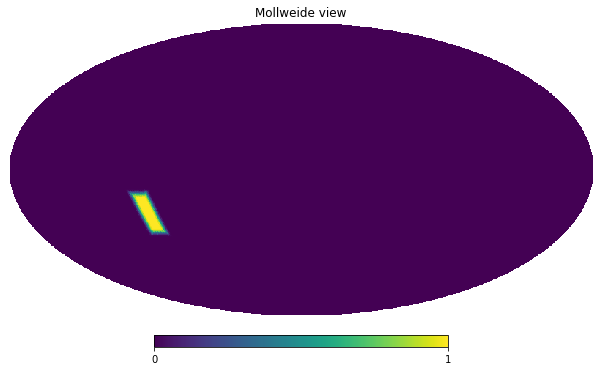

In [7]:
mask_apo = hp.read_map('small_patch_apo_128.fits')
hp.mollview(mask_apo)


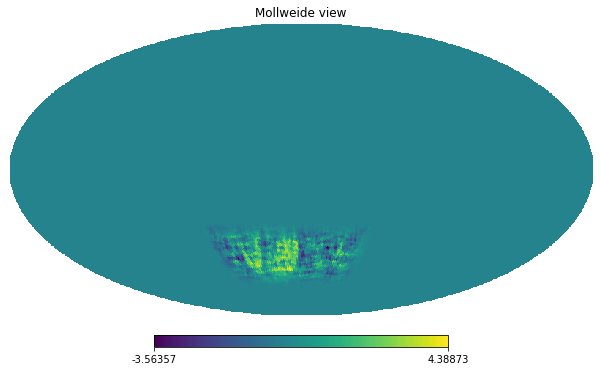

In [24]:
hp.mollview(mask_apo*m_in[1])